In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import tree

In [2]:
df = pd.read_csv('Dry_Bean.csv')
df.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [4]:
df.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


<AxesSubplot:>

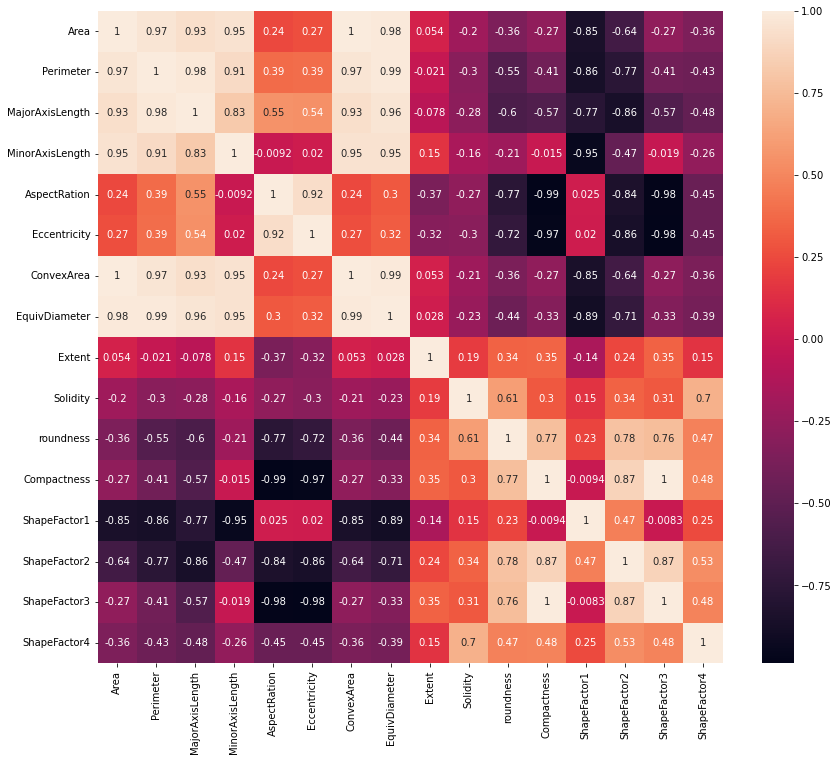

In [5]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True)

- we can see that __perimeter__ , __convexArea__ , __EquivDiameter__ are highly correlated with __Area__
- Also __Compactness__ is highly correlated with __AspectRatio__
- so we can drop these (__perimeter__ , __convexArea__ , __EquivDiameter__,__Compactness__) from the dataset

In [6]:
df.drop(['Perimeter','ConvexArea','EquivDiameter','Compactness'],inplace=True,axis=1)

<AxesSubplot:>

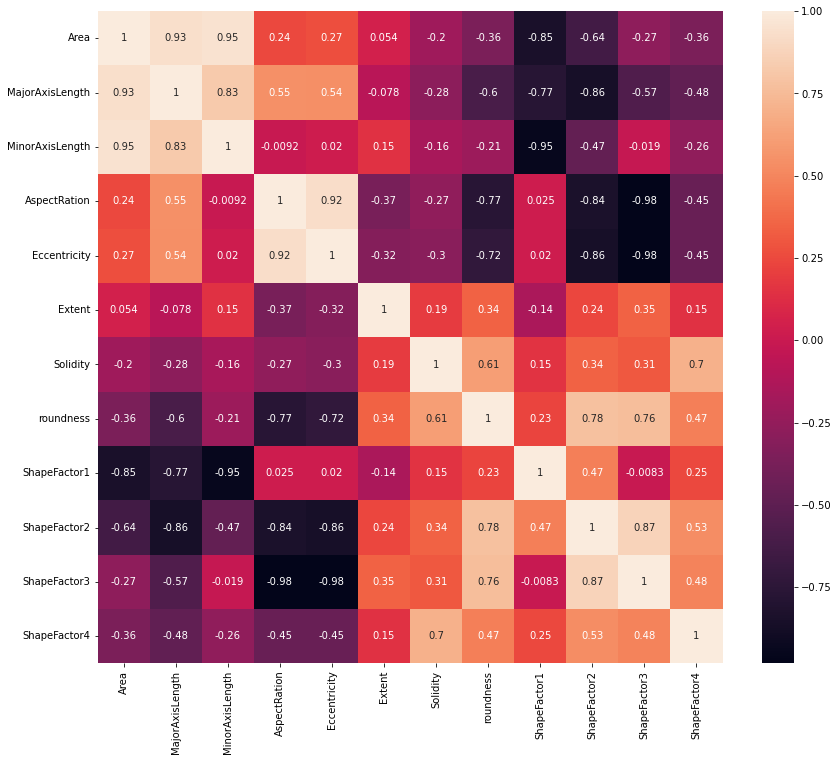

In [7]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True)

### No. of classification we have

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


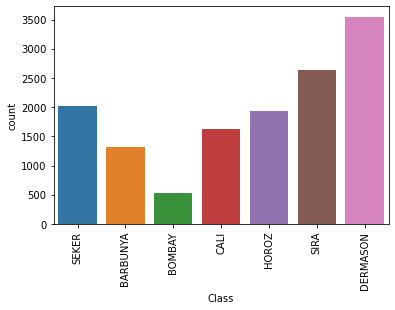

In [8]:
sns.countplot(df.Class)
plt.xticks(rotation = 'vertical')
plt.show()

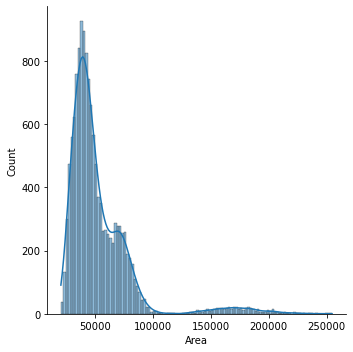

In [9]:
sns.displot(df.Area,kde=True)

- Area is highly positive skew we can make it normal by using __log__ __transformation__ , __power__ __transformation__

- we leave it as of now after the model training we will try to see that after transforming the data can we get the more accuracy

In [10]:
df[df['Class']=='BOMBAY']

,Area,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,Extent,Solidity,roundness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
3349,114004,451.361256,323.747996,1.394175,0.696795,0.748987,0.988777,0.875280,0.003959,0.001240,0.712495,0.993342,BOMBAY
3350,117034,425.923788,351.215109,1.212715,0.565722,0.746319,0.991654,0.917710,0.003639,0.001515,0.821407,0.996132,BOMBAY
3351,126503,475.772459,339.381887,1.401879,0.700830,0.771313,0.986609,0.902809,0.003761,0.001175,0.711561,0.997523,BOMBAY
3352,128118,504.024964,325.678447,1.547615,0.763206,0.782247,0.991058,0.870274,0.003934,0.001001,0.642120,0.993755,BOMBAY
3353,129409,484.364424,341.172659,1.419705,0.709831,0.799334,0.990213,0.893763,0.003743,0.001139,0.702312,0.997076,BOMBAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3866,237270,738.144502,412.921647,1.787614,0.828895,0.784115,0.985869,0.807399,0.003111,0.000590,0.554460,0.991160,BOMBAY
3867,241322,726.373493,427.370120,1.699636,0.808598,0.820823,0.987733,0.843641,0.003010,0.000630,0.582354,0.989790,BOMBAY
3868,248424,715.053040,446.043618,1.603101,0.781591,0.807536,0.989414,0.878992,0.002878,0.000679,0.618625,0.991718,BOMBAY
3869,251432,719.125690,450.926187,1.594775,0.778981,0.766776,0.976719,0.857211,0.002860,0.000676,0.619043,0.987235,BOMBAY


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[['Area','MajorAxisLength','MinorAxisLength','Eccentricity','Solidity','ShapeFactor1','ShapeFactor3','ShapeFactor4']]
Y = df['Class']

In [13]:
X.shape

(13611, 8)

In [14]:
Y.shape

(13611,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()

In [18]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Method

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
Logis = LogisticRegression()

In [21]:
Logis.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
predlog = Logis.predict(X_test)

In [23]:
print(classification_report(y_test,predlog))

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.89      0.90       450
      BOMBAY       1.00      0.99      1.00       178
        CALI       0.91      0.92      0.91       528
    DERMASON       0.92      0.90      0.91      1155
       HOROZ       0.97      0.95      0.96       638
       SEKER       0.95      0.94      0.94       664
        SIRA       0.85      0.89      0.87       879

    accuracy                           0.92      4492
   macro avg       0.93      0.93      0.93      4492
weighted avg       0.92      0.92      0.92      4492



In [24]:
print(accuracy_score(y_test,predlog))

0.9167408726625111


# Decision Tree Method

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
decisiontree = DecisionTreeClassifier()

In [27]:
decisiontree.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred_decisiontree = decisiontree.predict(X_test)

In [29]:
print(classification_report(y_test,y_pred_decisiontree))

              precision    recall  f1-score   support

    BARBUNYA       0.85      0.84      0.84       450
      BOMBAY       1.00      0.99      1.00       178
        CALI       0.88      0.88      0.88       528
    DERMASON       0.88      0.88      0.88      1155
       HOROZ       0.93      0.95      0.94       638
       SEKER       0.91      0.91      0.91       664
        SIRA       0.82      0.81      0.81       879

    accuracy                           0.88      4492
   macro avg       0.90      0.89      0.89      4492
weighted avg       0.88      0.88      0.88      4492



In [30]:
print(accuracy_score(y_test,y_pred_decisiontree)*100)

88.0899376669635


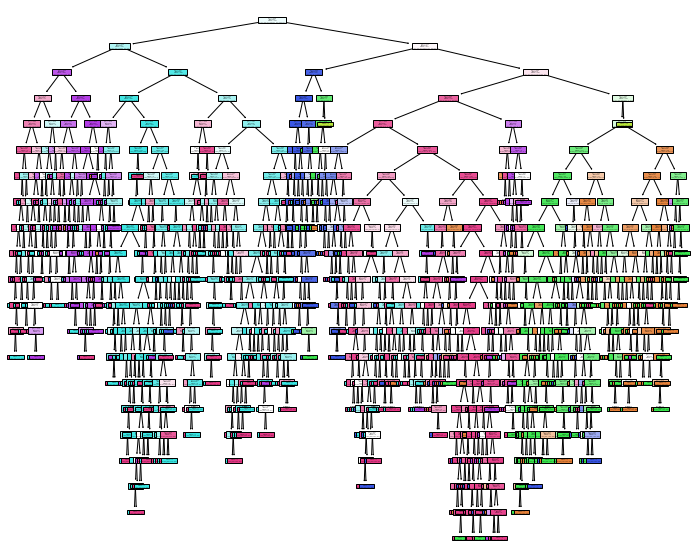

In [31]:
plt.figure(figsize=(12,10))
tree.plot_tree(decisiontree,filled=True)
plt.show()

# RandomForest Method

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
randomforest  = RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=5)

In [34]:
randomforest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=5)

In [35]:
y_pred_ranforest = randomforest.predict(X_test)

In [36]:
cn = confusion_matrix(y_test,y_pred_ranforest)

In [37]:
cn

array([[ 386,    0,   44,    0,    0,    4,   16],
       [   1,  177,    0,    0,    0,    0,    0],
       [  47,    0,  466,    0,    8,    2,    5],
       [   0,    0,    0, 1054,    2,   20,   79],
       [   2,    0,   14,    5,  599,    0,   18],
       [   5,    0,    0,   23,    0,  618,   18],
       [   5,    0,    3,  106,    9,   13,  743]], dtype=int64)

In [38]:
print(classification_report(y_test,y_pred_ranforest))

              precision    recall  f1-score   support

    BARBUNYA       0.87      0.86      0.86       450
      BOMBAY       1.00      0.99      1.00       178
        CALI       0.88      0.88      0.88       528
    DERMASON       0.89      0.91      0.90      1155
       HOROZ       0.97      0.94      0.95       638
       SEKER       0.94      0.93      0.94       664
        SIRA       0.85      0.85      0.85       879

    accuracy                           0.90      4492
   macro avg       0.91      0.91      0.91      4492
weighted avg       0.90      0.90      0.90      4492



In [39]:
print(accuracy_score(y_test,y_pred_ranforest)*100)

90.00445235975066


# KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier  

In [41]:
classifier= KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2 )  

In [42]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [43]:
y_predknn= classifier.predict(X_test)  

In [44]:
confusion_matrix(y_test, y_predknn) 

array([[ 387,    0,   41,    0,    2,    8,   12],
       [   0,  178,    0,    0,    0,    0,    0],
       [  31,    0,  479,    0,   11,    1,    6],
       [   0,    0,    0, 1009,    7,   20,  119],
       [   2,    0,   14,    5,  599,    0,   18],
       [   5,    0,    0,   24,    0,  616,   19],
       [   6,    0,    5,  106,   17,   18,  727]], dtype=int64)

In [45]:
print(accuracy_score(y_test,y_predknn)*100)

88.93588601959038


###  Hyper parameter tunning

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
accuracy_rate =[]
for i in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(classifier,X,Y,cv=10)
    accuracy_rate.append(score.mean())

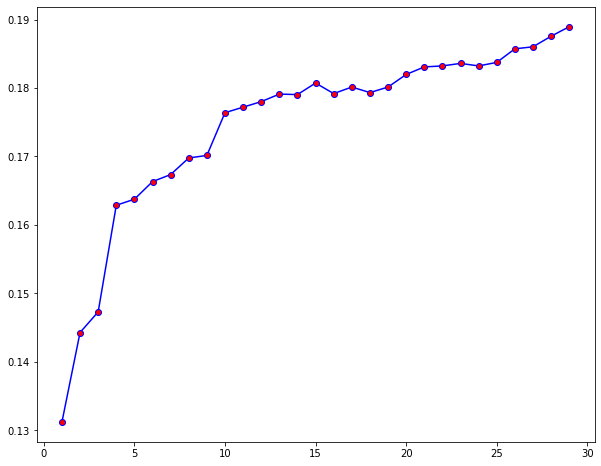

In [48]:
plt.figure(figsize=(10,8))
plt.plot(range(1,30),accuracy_rate,color='blue',markerfacecolor='red',marker='o')

In [49]:
classifier= KNeighborsClassifier(n_neighbors=14)  
classifier.fit(X_train, y_train)
y_predknn_hyperparams= classifier.predict(X_test) 
print(accuracy_score(y_test,y_predknn_hyperparams)*100)

91.82991985752449


# SVM

In [50]:
from sklearn.svm import SVC

In [51]:
kernal=['linear','rbf','poly','sigmoid']
for i in kernal:
    svc=SVC(kernel=i,C=1)
    svc.fit(X_train,y_train)
    predSVC = svc.predict(X_test)
    print('kernal',i)
#     print(accuracy_score(y_test,predSVC)*100)
    print(svc.score(X_test,y_test))

kernal linear
0.916073018699911
kernal rbf
0.921193232413179
kernal poly
0.9022707034728406
kernal sigmoid
0.706366874443455


### using GRIDSEARCH CV Hyperparameter 

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [54]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [55]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.908 total time=   3.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   3.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.918 total time=   3.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   2.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.911 total time=   2.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   2.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.906 total time=   2.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.923 total time=   2.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.916 total time=   2.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=   2.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.905 total time=   4.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.880 total time=   2.7s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.896 total time=   2.9s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.900 total time=   2.8s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.884 total time=   2.6s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.916 total time=   1.4s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.912 total time=   1.3s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.928 total time=   1.3s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.920 total time=   1.5s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.914 total time=   1.3s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.925 total time=   0.7s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.916 total time=   0.7s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.930 total time=   0.8s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [56]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [57]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.1)


In [58]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.89      0.91       450
      BOMBAY       1.00      1.00      1.00       178
        CALI       0.91      0.92      0.92       528
    DERMASON       0.90      0.93      0.91      1155
       HOROZ       0.97      0.95      0.96       638
       SEKER       0.96      0.94      0.95       664
        SIRA       0.88      0.87      0.87       879

    accuracy                           0.92      4492
   macro avg       0.93      0.93      0.93      4492
weighted avg       0.92      0.92      0.92      4492



## Therefore the best is to use the SVC in this case 
## with the accuracy of 92 %

In [60]:
from lazypredict.Supervised import LazyClassifier

X1 = df[['Area','MajorAxisLength','MinorAxisLength','Eccentricity','Solidity','ShapeFactor1','ShapeFactor3','ShapeFactor4']]
Y1 = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X1, Y1,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models11 ,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models11)


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:15<00:00,  1.88it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
SVC                                0.92               0.93    None      0.92   
LogisticRegression                 0.92               0.93    None      0.92   
KNeighborsClassifier               0.92               0.93    None      0.92   
CalibratedClassifierCV             0.91               0.92    None      0.91   
LinearSVC                          0.91               0.92    None      0.91   
LGBMClassifier                     0.91               0.92    None      0.91   
LabelSpreading                     0.91               0.92    None      0.91   
LabelPropagation                   0.91               0.92    None      0.91   
RandomForestClassifier             0.91               0.92    None      0.91   
SGDClassifier                      0.91               0.91    None      0.91   
BaggingClassifier                  0.90 